# Task 3: Introduction to Machine Learning

## Section 1: Setup & Dataset

### **Task 1**: Load the Dataset

*Instruction*: Load the preprocessed Titanic dataset (from the previous module or load again if needed). Separate it into features (`X`) and target (`y`, where target = `Survived`).

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic.csv')
# or 'titanic_preprocessed.csv' if using a different file

# Strip whitespace from column names (just in case)
df.columns = df.columns.str.strip()

# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Display shapes to confirm
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (887, 7)
Target shape: (887,)


## Section 2: Splitting the Data

### **Task 2**: Train/Test Split

*Instruction*:

Split the dataset into training and testing sets (80/20 split).


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shape of the splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)




Training features shape: (709, 7)
Testing features shape: (178, 7)
Training target shape: (709,)
Testing target shape: (178,)


## Section 3: Train Your First Model

### **Task 3**: Logistic Regression

*Instruction*: Train a Logistic Regression model on the Titanic dataset. Display accuracy on both train and test sets.



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('titanic.csv')
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
X = df[features]
y = df['Survived']

# Encode categorical feature
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8152
Testing Accuracy: 0.7528


<ipython-input-3-9667b057a7c9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = LabelEncoder().fit_transform(X['Sex'])


## Section 4: Model Evaluation

### **Task 4**: Confusion Matrix & Classification Report

*Instruction*: Evaluate the model using confusion matrix and classification report.

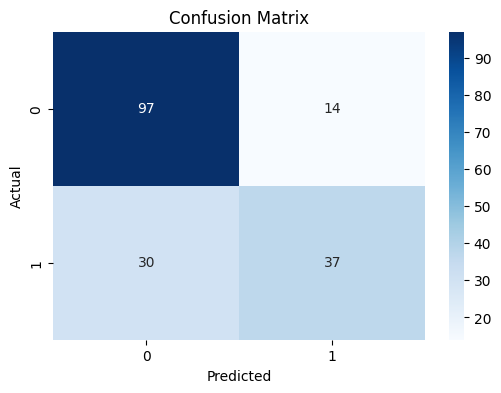

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.82       111
           1       0.73      0.55      0.63        67

    accuracy                           0.75       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.75      0.75      0.74       178



In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


## Section 5: Try Another Model

### **Task 5**:  Random Forest Classifier

*Instruction*: Train a `RandomForestClassifier` and compare its performance with Logistic Regression.



Random Forest Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



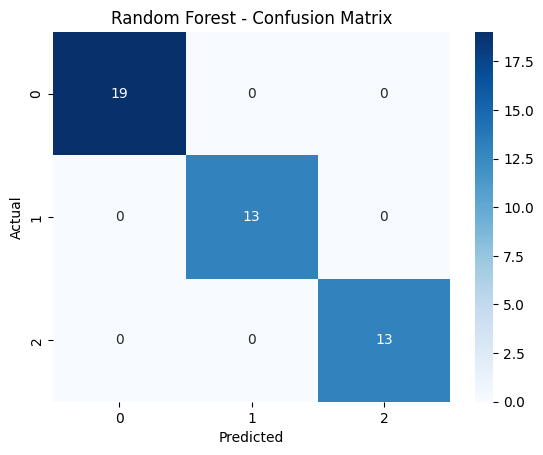


Logistic Regression Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



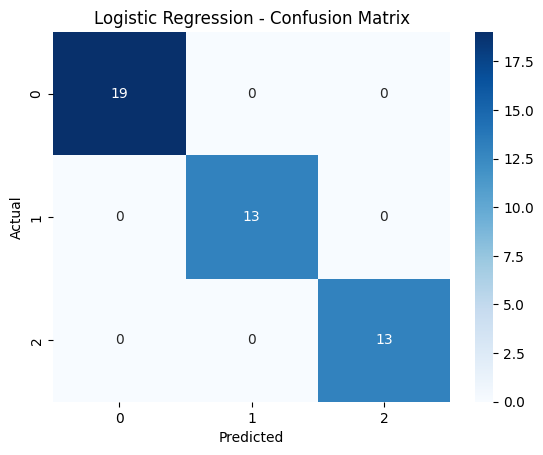

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Function to evaluate a model
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate both models
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("Logistic Regression", y_test, lr_pred)

## Section 6: Model Tuning

### **Task 6**: Hyperparameter Tuning (GridSearch)

*Instruction*:Use `GridSearchCV` to tune `n_estimators` and `max_depth` of the Random Forest model.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

